In [2]:
from keras.layers import LSTM, Bidirectional
from keras.models import Sequential


In [3]:
from sklearn import datasets
#import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import os
import numpy as np
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
import fnmatch as fn
from sklearn import metrics

In [4]:
# from scikit.learn.metrics import confusion_matrix

In [5]:
#from sklearn.metrics import *
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import fbeta_score
import openpyxl

In [6]:
dataset = pd.read_csv('data_length.csv')

C:\Users\Admin\Conda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
print(dataset.keys())

Index(['Unnamed: 0', 'Signal_power_2_7m', 'Signal_power_4_7m',
       'Signal_power_5_7m', 'Occupancy', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [8]:
from scipy.stats import kurtosis

In [9]:
#Kurtosis
kurt=[]
kurt.append(kurtosis(dataset.Signal_power_2_7m[0]))
for i in range(2,161):
    kurt.append(kurtosis(dataset.Signal_power_2_7m[0:i]))   

In [10]:
length = len(dataset)-160
for i in range(0,length):
    kurt.append(kurtosis(dataset.Signal_power_2_7m[i:i+161]))  
#print (kurt)   

In [11]:
dataset['K']=kurt

In [12]:
#Kurtosis
kurt1=[]
kurt1.append(kurtosis(dataset.Signal_power_4_7m[0]))
for i in range(2,161):
    kurt1.append(kurtosis(dataset.Signal_power_4_7m[0:i]))   

In [13]:
#length = len(dataset)-160
for i in range(0,length):
    kurt1.append(kurtosis(dataset.Signal_power_4_7m[i:i+161])) 

In [14]:
dataset['K4_7']=kurt1

In [15]:
#Kurtosis
kurt2=[]
kurt2.append(kurtosis(dataset.Signal_power_5_7m[0]))
for i in range(2,161):
    kurt2.append(kurtosis(dataset.Signal_power_5_7m[0:i]))   

In [16]:
#length = len(dataset)-160
for i in range(0,length):
    kurt2.append(kurtosis(dataset.Signal_power_5_7m[i:i+161])) 

In [17]:
dataset['K5_7']=kurt2

In [18]:
from scipy.stats import skew

In [19]:
#Skewness
Skew=[]
Skew.append(skew(dataset.Signal_power_2_7m[0]))
for i in range(2,161):
    Skew.append(skew(dataset.Signal_power_2_7m[0:i])) 
    

In [20]:
#length = len(dataset)-160
for i in range(0,length):
    Skew.append(skew(dataset.Signal_power_2_7m[i:i+161]))  

In [21]:
dataset['Sk']=Skew

In [22]:
#Skewness
Skew1=[]
Skew1.append(skew(dataset.Signal_power_4_7m[0]))
for i in range(2,161):
    Skew1.append(skew(dataset.Signal_power_4_7m[0:i])) 
    

In [23]:
#length = len(dataset)-160
for i in range(0,length):
    Skew1.append(skew(dataset.Signal_power_4_7m[i:i+161]))  

In [24]:
dataset['Sk4_7']=Skew1

In [25]:
#Skewness
Skew2=[]
Skew2.append(skew(dataset.Signal_power_5_7m[0]))
for i in range(2,161):
    Skew2.append(skew(dataset.Signal_power_5_7m[0:i])) 
    

In [26]:
#length = len(dataset)-160
for i in range(0,length):
    Skew2.append(skew(dataset.Signal_power_5_7m[i:i+161]))  

In [27]:
dataset['Sk5_7']=Skew2

In [28]:
# average
Avg=[]
Avg.append((dataset.Signal_power_2_7m[0]))
for i in range(2,161):
    Avg.append((sum(dataset.Signal_power_2_7m[0:i]))/i)

In [29]:
#length = len(dataset)-160
for i in range(0,length):
    Avg.append((sum(dataset.Signal_power_2_7m[i:i+161]))/161)

In [30]:
dataset['Avg']=Avg

In [31]:
# average
Avg1=[]
Avg1.append((dataset.Signal_power_4_7m[0]))
for i in range(2,161):
    Avg1.append((sum(dataset.Signal_power_4_7m[0:i]))/i)

In [32]:
#length = len(dataset)-160
for i in range(0,length):
    Avg1.append((sum(dataset.Signal_power_4_7m[i:i+161]))/161)

In [33]:
dataset['Avg4_7']=Avg1

In [34]:
# average
Avg2=[]
Avg2.append((dataset.Signal_power_5_7m[0]))
for i in range(2,161):
    Avg2.append((sum(dataset.Signal_power_5_7m[0:i]))/i)

In [35]:
#length = len(dataset)-160
for i in range(0,length):
    Avg2.append((sum(dataset.Signal_power_5_7m[i:i+161]))/161)

In [36]:
dataset['Avg5_7']=Avg2

In [37]:
#max signal power
Max=[]
Max.append((dataset.Signal_power_2_7m[0]))
for i in range(2,161):
    Max.append(max(dataset.Signal_power_2_7m[0:i])) 

In [38]:
#length = len(dataset)-160
for i in range(0,length):
    Max.append(max(dataset.Signal_power_2_7m[i:i+161]))  

In [39]:
dataset['Max_Signal']=Max

In [40]:
Max1=[]
Max1.append((dataset.Signal_power_4_7m[0]))
for i in range(2,161):
    Max1.append(max(dataset.Signal_power_4_7m[0:i])) 

In [41]:
#length = len(dataset)-160
for i in range(0,length):
    Max1.append(max(dataset.Signal_power_4_7m[i:i+161]))  

In [42]:
dataset['Max4_7']=Max1

In [43]:
Max2=[]
Max2.append((dataset.Signal_power_5_7m[0]))
for i in range(2,161):
    Max2.append(max(dataset.Signal_power_5_7m[0:i])) 

In [44]:
#length = len(dataset)-160
for i in range(0,length):
    Max2.append(max(dataset.Signal_power_5_7m[i:i+161]))  

In [45]:
dataset['Max5_7']=Max2

In [46]:
#max-min difference
Dif=[]
Dif.append((dataset.Signal_power_2_7m[0]))
for i in range(2,161):
    Dif.append((max(dataset.Signal_power_2_7m[0:i]))-(min(dataset.Signal_power_2_7m[0:i]))) 

In [47]:
#length = len(dataset)-160
for i in range(0,length):
    Dif.append((max(dataset.Signal_power_2_7m[i:i+161]))-(min(dataset.Signal_power_2_7m[i:i+161])))  

In [48]:
dataset['Min-Max']=Dif

In [49]:
#max-min difference
Dif1=[]
Dif1.append((dataset.Signal_power_4_7m[0]))
for i in range(2,161):
    Dif1.append((max(dataset.Signal_power_4_7m[0:i]))-(min(dataset.Signal_power_4_7m[0:i]))) 

In [50]:
#length = len(dataset)-160
for i in range(0,length):
    Dif1.append((max(dataset.Signal_power_4_7m[i:i+161]))-(min(dataset.Signal_power_4_7m[i:i+161])))

In [51]:
dataset['Min-Max_4_7']=Dif1

In [52]:
#max-min difference
Dif2=[]
Dif2.append((dataset.Signal_power_5_7m[0]))
for i in range(2,161):
    Dif2.append((max(dataset.Signal_power_5_7m[0:i]))-(min(dataset.Signal_power_5_7m[0:i]))) 

In [53]:
#length = len(dataset)-160
for i in range(0,length):
    Dif2.append((max(dataset.Signal_power_5_7m[i:i+161]))-(min(dataset.Signal_power_5_7m[i:i+161])))

In [54]:
dataset['Min-Max_5_7']=Dif2

In [55]:
#central difference
central_dif=[]
length1 = len(dataset)
for i in range(length1):
    if i == 0:
        diff = dataset.Signal_power_2_7m[i+1] - dataset.Signal_power_2_7m[i]
        central_dif.append(diff)
    elif i == 262168:
        diff1 = dataset.Signal_power_2_7m[i] - dataset.Signal_power_2_7m[i-1]
        central_dif.append(diff1)
    else:
        diff2 = dataset.Signal_power_2_7m[i+1] - dataset.Signal_power_2_7m[i-1]
        central_dif.append(diff2)

            

In [56]:
dataset['CD']=central_dif

In [57]:
#central difference
central_dif1=[]
#length = len(dataset)
for i in range(length1):
    if i == 0:
        diff3 = dataset.Signal_power_4_7m[i+1] - dataset.Signal_power_4_7m[i]
        central_dif1.append(diff3)
    elif i == 262168:
        diff4 = dataset.Signal_power_4_7m[i] - dataset.Signal_power_4_7m[i-1]
        central_dif1.append(diff4)
    else:
        diff5 = dataset.Signal_power_4_7m[i+1] - dataset.Signal_power_4_7m[i-1]
        central_dif1.append(diff5)

In [58]:
dataset['CD_4_7']=central_dif1

In [59]:
#central difference
central_dif2=[]
#length = len(dataset)
for i in range(length1):
    if i == 0:
        diff6 = dataset.Signal_power_5_7m[i+1] - dataset.Signal_power_5_7m[i]
        central_dif2.append(diff6)
    elif i == 262168:
        diff7 = dataset.Signal_power_5_7m[i] - dataset.Signal_power_5_7m[i-1]
        central_dif2.append(diff7)
    else:
        diff8 = dataset.Signal_power_5_7m[i+1] - dataset.Signal_power_5_7m[i-1]
        central_dif2.append(diff8)

In [60]:
dataset['CD_5_7']=central_dif2

In [61]:
#ewm
ewm_pd = dataset['Signal_power_2_7m'].ewm(span=160).mean()
dataset['EMA'] = ewm_pd

In [62]:
#ewm
ewm_pd1 = dataset['Signal_power_4_7m'].ewm(span=160).mean()
dataset['EMA_4_7'] = ewm_pd1

In [63]:
#ewm
ewm_pd2 = dataset['Signal_power_5_7m'].ewm(span=160).mean()
dataset['EMA_5_7'] = ewm_pd2

In [64]:
dataset=dataset.drop(['Unnamed: 0','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'],axis=1)

In [65]:
dataset

,Signal_power_2_7m,Signal_power_4_7m,Signal_power_5_7m,Occupancy,K,K4_7,K5_7,Sk,Sk4_7,Sk5_7,...,Max5_7,Min-Max,Min-Max_4_7,Min-Max_5_7,CD,CD_4_7,CD_5_7,EMA,EMA_4_7,EMA_5_7
0,-100.733010,-116.740234,-96.878884,unoccupied,-3.000000,-3.000000,-3.000000,0.000000e+00,0.000000,0.000000e+00,...,-96.878884,-100.733010,-116.740234,-96.878884,1.333956,1.511364,1.398399,-100.733010,-116.740234,-96.878884
1,-99.399053,-115.228869,-95.480485,unoccupied,-2.000000,-2.000000,-2.000000,-3.189845e-14,0.000000,-3.053058e-14,...,-95.480485,1.333956,1.511364,1.398399,1.964668,-0.794705,-1.858097,-100.061863,-115.979828,-96.175315
2,-98.768342,-117.534938,-98.736981,unoccupied,-1.500000,-1.500000,-1.500000,-4.058744e-01,0.359054,-1.708018e-01,...,-95.480485,1.964668,2.306069,3.256496,1.685392,-2.901699,-4.812415,-99.625288,-116.504691,-97.039899
3,-97.713661,-118.130569,-100.292901,unoccupied,-1.150830,-1.154481,-1.450267,-1.749294e-01,0.519093,-4.793412e-02,...,-95.480485,3.019348,2.901699,4.812415,-0.140741,-2.854496,0.196627,-99.138384,-116.918814,-97.868461
4,-98.909083,-120.389434,-98.540354,unoccupied,-0.680722,-0.775140,-1.143745,-3.390241e-01,-0.313302,1.857926e-01,...,-95.480485,3.019348,5.160565,4.812415,-3.504803,0.164399,1.821965,-99.091370,-117.630399,-98.006220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262164,-97.690305,-118.010881,-99.833333,unoccupied,-0.385995,1.286782,8.359927,-2.411378e-01,0.015658,1.835762e+00,...,-79.156496,10.865413,17.049770,27.214338,2.133129,-1.719357,-5.908484,-98.540853,-121.017525,-97.652627
262165,-97.546794,-120.627196,-101.667661,unoccupied,-0.389747,1.286181,8.280178,-2.493430e-01,0.012943,1.824131e+00,...,-79.156496,10.865413,17.049770,27.214338,-0.326100,-4.806594,3.097804,-98.528505,-121.012676,-97.702503
262166,-98.016405,-122.817475,-96.735528,unoccupied,-0.390696,1.281847,8.420102,-2.523693e-01,0.013495,1.836447e+00,...,-79.156496,10.865413,17.049770,27.214338,-3.052666,-0.270513,7.031414,-98.522143,-121.035096,-97.690491
262167,-100.599460,-120.897710,-94.636247,unoccupied,-0.382708,1.282363,8.281676,-2.537044e-01,0.011594,1.806304e+00,...,-79.156496,10.865413,17.049770,27.214338,-1.754516,-0.486018,-1.776601,-98.547948,-121.033389,-97.652550


In [66]:
dataset['Occupancy'].value_counts()

unoccupied    202583
occupied       59586
Name: Occupancy, dtype: int64

In [67]:
dataset.loc[(dataset.Occupancy == 'occupied'), 'Occupancy'] = 1
dataset.loc[(dataset.Occupancy == 'unoccupied'), 'Occupancy'] = 0

In [68]:
#training and testing
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import scikitplot as skplt 

In [75]:
dataset['Max']=dataset['Max_Signal']
dataset['Minmax']=Minmax['Min-Max']
dataset['Minmax47']=Minmax['Min-Max_4_7']
dataset['Minmax57']=Minmax['Min-Max_5_7']

NameError: name 'Minmax' is not defined

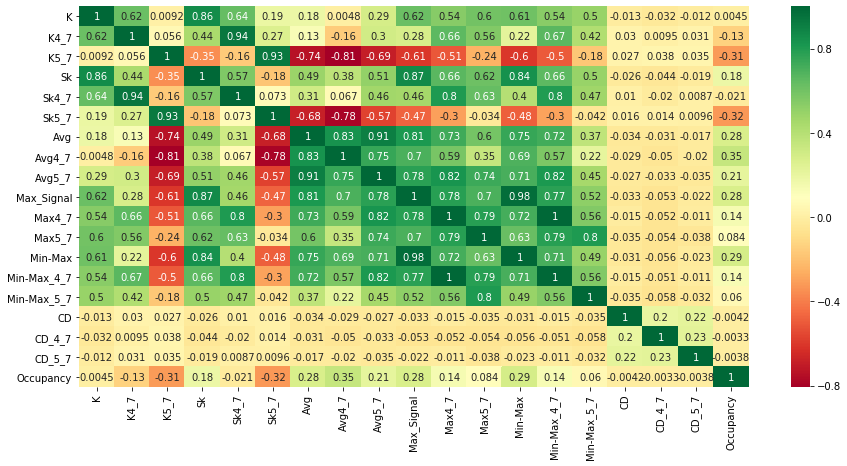

In [78]:
yourdata = dataset[['K','K4_7','K5_7','Sk','Sk4_7','Sk5_7','Avg','Avg4_7','Avg5_7','Max_Signal','Max4_7','Max5_7','Min-Max','Min-Max_4_7','Min-Max_5_7','CD','CD_4_7','CD_5_7','Occupancy']]
corr_matrix = yourdata.corr()
top_corr = corr_matrix.index
plt.figure(figsize=(15,7))
h=sns.heatmap(dataset[top_corr].corr(),annot=True,cmap="RdYlGn")

In [79]:
hel

NameError: name 'hel' is not defined

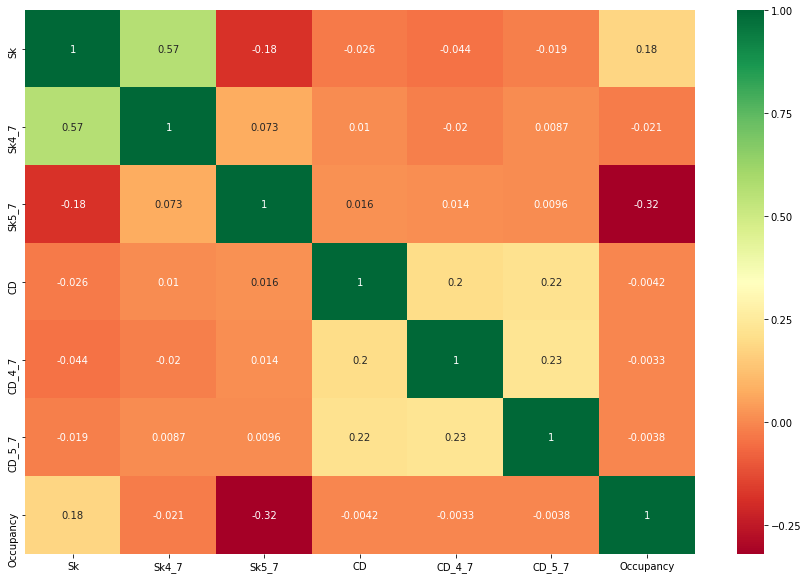

In [83]:
yourdata = dataset[['Sk','Sk4_7','Sk5_7','CD','CD_4_7','CD_5_7','Occupancy']]
corrmat = yourdata.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
X=dataset.drop(['Occupancy'],axis=1)
y=dataset['Occupancy']
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Performance of signal power at 2_7m

In [ ]:
#dropped Central difference,skewness as a part of feature selection

In [ ]:
import seaborn as sn

In [ ]:
x=dataset[['Signal_power_2_7m','Kurtosis','Average','Min-Max','Max_Signal','EMA']].values.reshape(262169,6)

In [ ]:
y=dataset['Occupancy'].values.reshape(262169,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 1)

In [ ]:
#checking the shape of occupied and unoccupied values

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [ ]:
y_train=y_train.ravel()

In [ ]:
#Random Over Sampling 
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [ ]:
train_X=X_resampled
train_y=y_resampled
test_X=X_test
test_y=y_test

In [ ]:
#Logistic Regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(train_X, train_y)
predicted_classes = model.predict(test_X)
print(accuracy_score(test_y,predicted_classes))

In [ ]:
cm=skplt.metrics.plot_confusion_matrix(test_y,predicted_classes)

In [ ]:
cr1=classification_report(test_y, predicted_classes, target_names=['No', 'Yes'])
print(cr1)

In [ ]:
#f score with beta 4
fbeta_score(test_y, predicted_classes,beta=4)

In [ ]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.metrics import accuracy_score
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(train_X, train_y).predict(test_X)
accuracy_score(test_y, y_pred)

In [ ]:
cm2=skplt.metrics.plot_confusion_matrix(test_y,y_pred)

In [ ]:
cr2=classification_report(test_y, y_pred, target_names=['No', 'Yes'])
print(cr2)

In [ ]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(train_X, train_y)
y_predict=clf.predict(test_X)
accuracy_score(test_y, y_predict)

In [ ]:
cm3=skplt.metrics.plot_confusion_matrix(test_y,y_predict)

In [ ]:
cr3=classification_report(test_y, y_predict, target_names=['No', 'Yes'])
print(cr3)

In [ ]:
from keras.models import Model
from keras.layers import Input, Activation
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
#Knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)
metrics.accuracy_score(test_y, y_pred)

In [ ]:
cm4=skplt.metrics.plot_confusion_matrix(test_y,y_pred)

In [ ]:
cr4=classification_report(test_y, y_pred, target_names=['No', 'Yes'])
print(cr4)

In [ ]:
#f score with beta 4
fbeta_score(test_y, y_pred,beta=4)

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_X,train_y)
rfc_predict = rfc.predict(test_X)
metrics.accuracy_score(test_y, rfc_predict)

In [ ]:
cm5=skplt.metrics.plot_confusion_matrix(test_y,rfc_predict)

In [ ]:
cr5=classification_report(test_y, rfc_predict, target_names=['No', 'Yes'])
print(cr5)

In [ ]:
#LR2
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(train_X)

# Apply the scaler to the test data
X_test_std = sc.transform(test_X)

In [ ]:
#LR2
C=[0.001, 0.01]
for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf.fit(train_X, train_y)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, train_y))
    print('Test accuracy:', clf.score(X_test_std, test_y))
    print('')

In [ ]:
LR2_pred = clf.predict(test_X)
metrics.accuracy_score(test_y, LR2_pred)

In [ ]:
cm_ldr2=skplt.metrics.plot_confusion_matrix(test_y,LR2_pred)

In [ ]:
cr_ldr=classification_report(test_y, LR2_pred, target_names=['No', 'Yes'])
print(cr_ldr)

In [ ]:
#f score with beta 4
fbeta_score(test_y, LR2_pred,beta=4)

In [ ]:
trainX = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
testX = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn import metrics

In [ ]:
#bi-lstm
model = Sequential()
model.add(Bidirectional(LSTM(30, input_shape=(1, 6))))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, train_y, epochs=30, batch_size=100, verbose=2)

In [ ]:
y_pred = model.predict_classes(testX, verbose=0)

In [ ]:
accuracy_score(test_y, y_pred, normalize=True)

In [ ]:
cm_lst=skplt.metrics.plot_confusion_matrix(test_y,y_pred)

In [ ]:
cr7=classification_report(test_y, y_pred, target_names=['No', 'Yes'])
print(cr7)

# Performance of signal power at 4_7m

In [ ]:
#dropped Central_difference_4_7, Skewness_4_7 as a part of feature selection

In [ ]:
x_1=dataset[['Signal_power_4_7m','Kurtosis_4_7','Average_4_7','Min-Max_4_7','Max_Signal_4_7','EMA_4_7']].values.reshape(262169,6)

In [ ]:
y_1=dataset['Occupancy'].values.reshape(262169,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.2,random_state = 1)

In [ ]:
y_train=y_train.ravel()

In [ ]:
ros = RandomOverSampler(random_state=0)
X_resampled_4, y_resampled_4 = SMOTE().fit_resample(X_train,y_train)

In [ ]:
train_X=X_resampled_4
train_y=y_resampled_4
test_X=X_test
test_y=y_test

In [ ]:
#logistic regression
model = LogisticRegression()
model.fit(train_X, train_y)
predicted_classes = model.predict(test_X)
accuracy = accuracy_score(test_y,predicted_classes)
parameters = model.coef_
accuracy

In [ ]:
cm6=skplt.metrics.plot_confusion_matrix(test_y,predicted_classes)

In [ ]:
cr8=classification_report(test_y, predicted_classes, target_names=['No', 'Yes'])
print(cr8)

In [ ]:
#lda
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(train_X, train_y).predict(test_X)
accuracy_score(test_y, y_pred)

In [ ]:
cm7=skplt.metrics.plot_confusion_matrix(test_y,y_pred)

In [ ]:
cr9=classification_report(test_y, y_pred, target_names=['No', 'Yes'])
print(cr9)

In [ ]:
#QDA
clf = QuadraticDiscriminantAnalysis()
clf.fit(train_X, train_y)
y_predict=clf.predict(test_X)
accuracy_score(test_y, y_predict)

In [ ]:
cm8=skplt.metrics.plot_confusion_matrix(test_y,y_predict)

In [ ]:
cr10=classification_report(test_y, y_predict, target_names=['No', 'Yes'])
print(cr10)

In [ ]:
#Knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)
metrics.accuracy_score(test_y, y_pred)

In [ ]:
cm9=skplt.metrics.plot_confusion_matrix(test_y,y_pred)

In [ ]:
cr11=classification_report(test_y, y_pred, target_names=['No', 'Yes'])
print(cr11)

In [ ]:
#f score with beta 4
fbeta_score(test_y, y_pred,beta=4)

In [ ]:
#random forest
rfc = RandomForestClassifier()
rfc.fit(train_X,train_y)
rfc_predict = rfc.predict(test_X)
metrics.accuracy_score(test_y, rfc_predict)

In [ ]:
cm0=skplt.metrics.plot_confusion_matrix(test_y,rfc_predict)

In [ ]:
cr12=classification_report(test_y, rfc_predict, target_names=['No', 'Yes'])
print(cr12)

In [ ]:
trainX = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
testX = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [ ]:
#bi directional
model = Sequential()
model.add(Bidirectional(LSTM(30, input_shape=(1, 6))))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, train_y, epochs=30, batch_size=100, verbose=2)

In [ ]:
y_pred = model.predict_classes(testX, verbose=0)    

In [ ]:
accuracy_score(test_y, y_pred, normalize=True)

In [ ]:
cm_l_l=skplt.metrics.plot_confusion_matrix(test_y,y_pred)

In [ ]:
cr14=classification_report(test_y, y_pred, target_names=['No', 'Yes'])
print(cr14)

In [ ]:
#LR2
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(train_X)

# Apply the scaler to the test data
X_test_std = sc.transform(test_X)

In [ ]:
C=[0.001, 0.01]
for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf.fit(train_X, train_y)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, train_y))
    print('Test accuracy:', clf.score(X_test_std, test_y))
    print('')

In [ ]:
LR2_pred = clf.predict(test_X)
metrics.accuracy_score(test_y, LR2_pred)

In [ ]:
cm_ldr2=skplt.metrics.plot_confusion_matrix(test_y,LR2_pred)

In [ ]:
crldr2=classification_report(test_y, LR2_pred, target_names=['No', 'Yes'])
print(crldr2)

In [ ]:
#f score with beta 4
fbeta_score(test_y, LR2_pred,beta=4)

# Performance of signal power at 5_7m

In [ ]:
#dropped Central_difference_5_7, Skewness_5_7 as a part of feature selection

In [ ]:
x_2=dataset[['Signal_power_5_7m','Kurtosis_5_7','Average_5_7','Min-Max_5_7','Max_Signal_5_7','EMA_5_7']].values.reshape(262169,6)

In [ ]:
y_2=dataset['Occupancy'].values.reshape(262169,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.2,random_state = 1)

In [ ]:
y_train=y_train.ravel()

In [ ]:
ros = RandomOverSampler(random_state=0)
X_resampled_5, y_resampled_5 = SMOTE().fit_resample(X_train,y_train)

In [ ]:
train_X=X_resampled_5
train_y=y_resampled_5
test_X=X_test
test_y=y_test

In [ ]:
#Logistic Regression
model = LogisticRegression()
model.fit(train_X, train_y)
predicted_classes = model.predict(test_X)
accuracy = accuracy_score(test_y,predicted_classes)
parameters = model.coef_
accuracy

In [ ]:
cm11=skplt.metrics.plot_confusion_matrix(test_y,predicted_classes)

In [ ]:
cr15=classification_report(test_y, predicted_classes, target_names=['No', 'Yes'])
print(cr15)

In [ ]:
#f score with beta 4
fbeta_score(test_y, predicted_classes,beta=4)

In [ ]:
#LDA
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(train_X, train_y).predict(test_X)
accuracy_score(test_y, y_pred)

In [ ]:
cm12=skplt.metrics.plot_confusion_matrix(test_y,y_pred)

In [ ]:
cr16=classification_report(test_y, y_pred, target_names=['No', 'Yes'])
print(cr16)

In [ ]:
#f score with beta 4
fbeta_score(test_y, y_pred,beta=4)

In [ ]:
#QDA
clf = QuadraticDiscriminantAnalysis()
clf.fit(train_X, train_y)
y_predict=clf.predict(test_X)
accuracy_score(test_y, y_predict)

In [ ]:
cm13=skplt.metrics.plot_confusion_matrix(test_y,y_predict)

In [ ]:
cr17=classification_report(test_y, y_predict, target_names=['No', 'Yes'])
print(cr17)

In [ ]:
#f score with beta 4
fbeta_score(test_y, y_predict,beta=4)

In [ ]:
#Knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)
metrics.accuracy_score(test_y, y_pred)

In [ ]:
cm14=skplt.metrics.plot_confusion_matrix(test_y,y_pred)

In [ ]:
cr18=classification_report(test_y, y_pred, target_names=['No', 'Yes'])
print(cr18)

In [ ]:
#f score with beta 4
fbeta_score(test_y, y_pred,beta=4)

In [ ]:
#Random forest
rfc = RandomForestClassifier()
rfc.fit(train_X,train_y)
rfc_predict = rfc.predict(test_X)
metrics.accuracy_score(test_y, rfc_predict)

In [ ]:
cm15=skplt.metrics.plot_confusion_matrix(test_y,rfc_predict)

In [ ]:
cr19=classification_report(test_y, rfc_predict, target_names=['No', 'Yes'])
print(cr19)

In [ ]:
trainX = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
testX = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [ ]:
#bi-lstm
model = Sequential()
model.add(Bidirectional(LSTM(30, input_shape=(1, 6))))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, train_y, epochs=30, batch_size=100, verbose=2)

In [ ]:
y_pred = model.predict_classes(testX, verbose=0)  

In [ ]:
accuracy_score(test_y, y_pred, normalize=True)

In [ ]:
cm_l_3=skplt.metrics.plot_confusion_matrix(test_y,y_pred)

In [ ]:
cr21=classification_report(test_y, y_pred, target_names=['No', 'Yes'])
print(cr21)

In [ ]:
# logistic reg. L1
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(train_X)

# Apply the scaler to the test data
X_test_std = sc.transform(test_X)

In [ ]:
#lr2
C=[0.001, 0.01]
for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf.fit(train_X, train_y)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, train_y))
    print('Test accuracy:', clf.score(X_test_std, test_y))
    print('')

In [ ]:
LR2_pred = clf.predict(test_X)
metrics.accuracy_score(test_y, LR2_pred)

In [ ]:
cm_ldr=skplt.metrics.plot_confusion_matrix(test_y,LR2_pred)

In [ ]:
crldr=classification_report(test_y, LR2_pred, target_names=['No', 'Yes'])
print(crldr)

In [ ]:
#f score with beta 4
fbeta_score(test_y, LR2_pred,beta=4)

# Combined

In [ ]:
#dropped Central_difference,Central_difference_4_7,Central_difference_5_7,Skewness_4_7,Skewness_5_7 as a part of feature selection

In [ ]:
x_3=dataset[['Signal_power_2_7m','Signal_power_4_7m','Signal_power_5_7m','Kurtosis','Kurtosis_4_7','Kurtosis_5_7','Average','Average_4_7','Average_5_7','Min-Max','Min-Max_4_7','Min-Max_5_7','Max_Signal','Max_Signal_4_7','Max_Signal_5_7','EMA','EMA_4_7','EMA_5_7']].values.reshape(262169,18)


In [ ]:
y_3=dataset['Occupancy'].values.reshape(262169,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_3, y_3, test_size=0.2,random_state = 1)

In [ ]:
y_train=y_train.ravel()

In [ ]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [ ]:
train_X=X_resampled
train_y=y_resampled
test_X=X_test
test_y=y_test

In [ ]:
#Logistic Regression
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(train_X, train_y)
predicted_classes = model.predict(test_X)
accuracy = accuracy_score(test_y,predicted_classes)
parameters = model.coef_
accuracy

In [ ]:
cm_14=skplt.metrics.plot_confusion_matrix(test_y,predicted_classes)

In [ ]:
cr22=classification_report(test_y, predicted_classes, target_names=['No', 'Yes'])
print(cr22)

In [ ]:
#f score with beta 4
fbeta_score(test_y, predicted_classes,beta=4)

In [ ]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(train_X, train_y).predict(test_X)
accuracy_score(test_y, y_pred)

In [ ]:
cm15=skplt.metrics.plot_confusion_matrix(test_y,y_pred)


In [ ]:
cr23=classification_report(test_y, y_pred, target_names=['No', 'Yes'])
print(cr23)

In [ ]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(train_X, train_y)
y_predict=clf.predict(test_X)
accuracy_score(test_y, y_predict)

In [ ]:
cm16=skplt.metrics.plot_confusion_matrix(test_y,y_predict)

In [ ]:
cr24=classification_report(test_y, y_predict, target_names=['No', 'Yes'])
print(cr24)

In [ ]:
#Knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)
metrics.accuracy_score(test_y, y_pred)

In [ ]:
cm17=skplt.metrics.plot_confusion_matrix(test_y,y_pred)

In [ ]:
cr25=classification_report(test_y, y_pred, target_names=['No', 'Yes'])
print(cr25)

In [ ]:
#f score with beta 4
fbeta_score(test_y, y_pred,beta=4)

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_X,train_y)
rfc_predict = rfc.predict(test_X)
metrics.accuracy_score(test_y, rfc_predict)

In [ ]:
cm18=skplt.metrics.plot_confusion_matrix(test_y,rfc_predict)

In [ ]:
cr26=classification_report(test_y, rfc_predict, target_names=['No', 'Yes'])
print(cr26)

In [ ]:
trainX = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
testX = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [ ]:
#bilstm
model = Sequential()
model.add(Bidirectional(LSTM(150, input_shape=(1, 18))))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, train_y, epochs=30, batch_size=100, verbose=2)

In [ ]:
y_pred = model.predict_classes(testX, verbose=0)  

In [ ]:
accuracy_score(test_y, y_pred, normalize=True)

In [ ]:
cm20=skplt.metrics.plot_confusion_matrix(test_y,y_pred)


In [ ]:
cr28=classification_report(test_y, y_pred, target_names=['No', 'Yes'])
print(cr28)

In [ ]:
# logistic reg. L1
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(train_X)

# Apply the scaler to the test data
X_test_std = sc.transform(test_X)

In [ ]:
C=[0.001, 0.01]
for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf.fit(train_X, train_y)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, train_y))
    print('Test accuracy:', clf.score(X_test_std, test_y))
    print('')

In [ ]:
LR2_pred = clf.predict(test_X)
metrics.accuracy_score(test_y, LR2_pred)

In [ ]:
cm_ldr=skplt.metrics.plot_confusion_matrix(test_y,LR2_pred)

In [ ]:
crldr=classification_report(test_y, LR2_pred, target_names=['No', 'Yes'])
print(crldr)

In [ ]:
#f score with beta 4
fbeta_score(test_y, LR2_pred,beta=4)